VAMOS A EMPEZAR CON MI ANALISIS EXPLORATORIO DE DATOS.
Voy a investigar los dataset para lograr visualizar un mapa conceptual de la información que disponen, para así pdoer entender el comportamiento y llegar a plantear mi objetivo: Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.
Voy a partir de 16 (llega hasta el 17, pero el 7 no está) archivos csv, durante la exploración dejaré en el camino los archivos que no considere necesarios... Let´s go!!!

In [71]:
#importo las librerías que voy a utilizar
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

CARGO TODOS LOS DATASET

In [8]:
df1=pd.read_csv('csv/1.Internet_Penetracion.csv')
df2=pd.read_csv('csv/2.Internet_Penetracion.csv')
df3=pd.read_csv('csv/3.Internet_BAF.csv')
df4=pd.read_csv('csv/4.Internet_BAF.csv')
df5=pd.read_csv('csv/5.Internet_Accesos-por-tecnologia.csv')
df6=pd.read_csv('csv/6.Internet_Accesos-por-tecnologia.csv')
df8=pd.read_csv('csv/8.historico_velocidad_internet.csv')
df9=pd.read_csv('csv/9.historico_velocidad_internet.csv')
df10=pd.read_csv('csv/10.Internet_Accesos-por-velocidad.csv')
df11=pd.read_csv('csv/11.Internet_Accesos-por-velocidad.csv')
df12=pd.read_csv('csv/12.AccesosaInternetfijoporvelocidadbajadayprovincia_2791741682002789707.csv')
df13=pd.read_csv('csv/13.Internet_Ingresos.csv')
df14=pd.read_csv('csv/14.AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171682002869589.csv')
df15=pd.read_csv('csv/15.AccesosaInternetfijoportecnologiaylocalidad_2791751682002968431.csv')
df16=pd.read_csv('csv/16.Listadodelocalidadesconconectividadainternet_2750221682002632159.csv')
df17=pd.read_csv('csv/17.ConectividadalserviciodeInternet_2776151682003289226.csv')

In [21]:
df1.head(50)   #Acceso por cada 100 hogares distribuido por porvincias, año y trimestre

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38
5,2022,3,Córdoba,88.31
6,2022,3,Corrientes,48.21
7,2022,3,Entre Ríos,63.67
8,2022,3,Formosa,43.76
9,2022,3,Jujuy,58.91


In [11]:
df1.shape

(840, 4)

In [12]:
df2.head() #Acceso por cada 100 hogares y por cada 100 habitantes, distribuido por trimestre. Es general sin distinguir entre provincias

#LO DESCARTO PORQUE ES REDUNDANTE CON EL DF1

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,"76,64","23,95",Jul-Sept 2022
1,2022,2,"75,97","23,72",Abr-Jun 2022
2,2022,1,"73,88","23,05",Ene-Mar 2022
3,2021,4,"73,18","22,81",Oct-Dic 2021
4,2021,3,"70,58","21,98",Jul-Sept 2021


In [13]:
df2.shape

(35, 5)

In [14]:
df3.head() #Acceso por banda ancha y por banda angosta, por trimestre, general sin distinguir entre provincias

#LO DESCARTO PORQUE EL DF4 ES MAS COMPLETO

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022
2,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
3,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
4,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021


In [15]:
df3.shape

(35, 6)

In [35]:
df4.head(30) #Acceso por banda ancha y por banda angosta, por trimestre, por provincia

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4715469,6199,4721668
1,2022,3,Capital Federal,1545534,2145,1547679
2,2022,3,Catamarca,70292,1,70293
3,2022,3,Chaco,144141,5,144146
4,2022,3,Chubut,164874,904,165778
5,2022,3,Córdoba,1038600,68,1038668
6,2022,3,Corrientes,144842,4,144846
7,2022,3,Entre Ríos,268937,22,268959
8,2022,3,Formosa,68537,1,68538
9,2022,3,Jujuy,118823,0,118823


In [17]:
df4.shape

(840, 6)

In [59]:
df5.head() #Acceso por ADSL,Cablemodem,Fibra óptica,Wireless,Otro. Por trimestre, sin distincion entre provincias
	

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021


In [19]:
df5.shape

(35, 9)

In [55]:
df6.sample(40) #Acceso por ADSL,Cablemodem,Fibra óptica,Wireless,Otro. Por trimestre, por provincias

#LO DESCARTO PORQUE ESTA HORRIBLE

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
408,20001080,020,Buenos Aires,1.450.203,1.807.868,143.626,71.256,27.746,3.500.699
187,20002000,040,Santa Cruz,12.347,19.657,1.041,4.659,2.970,40.674
471,20001070,040,Río Negro,68.690,30.451,1.250,4.259,5.114,109.764
120,20002010,020,Buenos Aires,603.255,2.503.830,854.173,113.546,57.547,4.132.351
171,20002000,040,Chaco,44.332,61.200,23.687,7.997,1.875,139.091
272,20001090,040,Formosa,21.567,8.684,1.760,14.531,169.000,46.711
255,20002000,010,Río Negro,47.756,38.479,10.381,11.222,18.362,126.200
136,20002010,020,Salta,51.396,96.016,32.050,5.724,6.453,191.639
60,20002020,010,Mendoza,49.464,74.145,123.228,26.969,1.379,275.185
189,20002000,040,Santiago Del Estero,26.812,70.522,570,5.169,3.596,106.669


In [21]:
df6.shape

(841, 9)

In [22]:
df8.head() #Velocidad media de bajada, por trimestre, sin distinción de provincias

#LO DESCARTO PORQUE EL DF9 ES MAS COMPLETO

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2022,3,"62,46",Jul-Sept 2022
1,2022,2,"58,44",Abr-Jun 2022
2,2022,1,"55,11",Ene-Mar 2022
3,2021,4,"52,34",Oct-Dic 2021
4,2021,3,"48,46",Jul-Sept 2021


In [23]:
df8.shape

(35, 4)

In [24]:
df9.head() #Velocidad media de bajada, por trimestre, por provincia

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN


In [25]:
df9.shape

(840, 6)

In [26]:
df10.head() #Distinción de velocidades de bajada en: Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,	
#Entre 10 Mbps y 20 Mbps, Entre 20 Mbps y 30 Mbps, Más de 30 Mbps, OTROS. Por trimestre, sin distinción entre provincias

#LO DESCARTO PORQUE PREFIERO TRABAJAR CON LOS PROMEDIOS DEL DF9 (ASUMO QUE SON PROMEDIOS)

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,Unnamed: 11
0,2022,3,33.013,96.727,1.161.370,1.151.906,823.505,479.822,6.995.750,349.035,11.091.128,NaN
1,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684,NaN
2,2022,1,34.890,104.840,1.263.273,1.209.148,967.508,509.830,6.336.187,198.333,10.624.009,NaN
3,2021,4,41.262,28.521,1.413.208,1.245.333,976.539,558.358,6.032.322,194.251,10.489.794,NaN
4,2021,3,40.174,41.437,2.550.229,1.095.772,710.122,536.364,4.948.174,163.269,10.085.541,NaN


In [27]:
df10.shape

(35, 12)

In [28]:
df11.head()#Distinción de velocidades de bajada en rangos: Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,	
#Entre 10 Mbps y 20 Mbps, Entre 20 Mbps y 30 Mbps, Más de 30 Mbps, OTROS. Por trimestre, por provincia

#LO DESCARTO PORQUE PREFIERO TRABAJAR CON LOS PROMEDIOS DEL DF9 (ASUMO QUE SON PROMEDIOS)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


In [30]:
df11.shape

(840, 12)

In [31]:
df12.head() #Acceso por velocidades de bajada, solo que ahora por Mbps (fijo, sin rangos). Desde 0,256 Mbps hasta 86 Mbps.
#por trimestre, por provincia

#LO DESCARTO PORQUE PREFIERO TRABAJAR CON LOS PROMEDIOS DEL DF9 (ASUMO QUE SON PROMEDIOS)

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps
0,2022.0,3.0,Buenos Aires,"65,821",19,- 0,- 0,"29,774",192,"4,611",...,"3,163",- 0,"98,387",- 0,2,223,- 0,1,- 0,- 0
1,2022.0,3.0,Capital Federal,"105,477",31,- 0,- 0,451,35,"1,307",...,3,- 0,"30,482",- 0,- 0,8,- 0,- 0,- 0,- 0
2,2022.0,3.0,Catamarca,"2,208",- 0,- 0,- 0,34,37,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
3,2022.0,3.0,Chaco,"3,711",- 0,225,111,234,2,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
4,2022.0,3.0,Chubut,"20,024",8,- 0,- 0,69,32,836,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0


In [32]:
df12.shape

(481, 97)

In [33]:
df13.head() #Ingresos por prestación de servicios, por trimestre, en todo el país.

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021


In [34]:
df13.shape

(35, 4)

In [45]:
df14.sample(n=15) #Acceso por velocidades de bajada, solo que ahora por Mbps (fijo, sin rangos). Desde 0,256 Mbps hasta 100 Mbps.
#Sin disntinguir trimestre ni año (por ende, no se de cuando son estos datos).
#Distinguiendo provincia, partido y localidad.
#(Los datos de estos campos son numeros o nulos, no se si corresponden a personas, hogares, o vaya a saber qué)

#LO DESCARTO PORQUE COMO DIJE ANTES, NO SE BIEN QUE DATOS REPRESENTAN ESOS NUMEROS

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
434,BUENOS AIRES,Luján,Otros,Sin Datos,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1976,MISIONES,25 de Mayo,Colonia Alicia,54119020,20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
953,CORDOBA,Calamuchita,Villa Yacanto,14007360,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1104,CORDOBA,Punilla,Villa Santa Cruz del Lago,14091320,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2978,SANTIAGO DEL ESTERO,Moreno,Pueblo Pablo Torelo (Est. Otumpa),86119090,50,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2282,SALTA,La Candelaria,El Tala,66084020,NaN,NaN,NaN,4,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1191,CORDOBA,San Javier,Los Molles,14133130,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2955,SANTIAGO DEL ESTERO,General Taboada,Tomás Young,86077060,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1006,CORDOBA,General San Martín,Chazón,14042040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2952,SANTIAGO DEL ESTERO,General Taboada,Averías,86077020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df14.shape

(3098, 83)

In [44]:
df15.head() #Acceso por tecnología: ADSL, CABLEMODEM, DIAL UP, FIBRA OPTICA, OTROS, SATELITAL, WIMAX, WIRELESS. (Los datos de estos campos son
#numeros, no se si corresponden a personas, hogares, o vaya a saber qué)
#Por provincia, por partido y por localidad
#Tampoco tengo fechas acá

#LO DESCARTO PORQUE COMO DIJE ANTES, NO SE BIEN QUE DATOS REPRESENTAN ESOS NUMEROS

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1.282,NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN


In [42]:
df15.shape

(3142, 14)

In [43]:
df16.head() #Acceso por tecnlogia: ADSL	CABLEMODEM	DIALUP	FIBRAOPTICA	4G	3G	TELEFONIAFIJA	WIRELESS	SATELITAL
#dispone cada localidad, distinguido por partido y provincia. Tampoco tengo fechas. Cada tipo de coneccion es un campo y le corresponde "si"
#en caso de tenerla o "--"" en caso de no.

#LO DESCARTO PORQUE EL DF17 ES MAS COMPLETO

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,--,--,--,--,SI,SI,--,--,--
1,BUENOS AIRES,Bahía Blanca,Villa Espora,--,--,--,--,--,--,--,--,--
2,BUENOS AIRES,Balcarce,Balcarce,SI,SI,SI,SI,SI,SI,SI,SI,--
3,BUENOS AIRES,Balcarce,Los Pinos,--,--,--,--,--,--,SI,SI,--
4,BUENOS AIRES,Balcarce,Napaleofú,--,--,--,SI,SI,SI,SI,SI,--


In [39]:
df16.shape

(4312, 12)

In [40]:
df17.head() #Distinción de qué tipo de conecciones (ADSL	CABLEMODEM	DIALUP	FIBRAOPTICA	4G	3G	TELEFONIAFIJA	WIRELESS	SATELITAL) 
#dispone cada localidad, distinguido por partido y provincia, además agrega latitud y longitud. Tampoco tengo fechas. 
# Cada tipo de coneccion es un campo y le corresponde "si" en caso de tenerla o "--"" en caso de no.
#tambien me agrega la población que tiene cada localidad

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,"-38,6472605094596","-62,3200223419024"
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248"
3,BUENOS AIRES,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442"
4,BUENOS AIRES,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"


In [41]:
df17.shape

(4312, 16)

ME QUEDO CON LOS SIGUIENTES DATASET: 

df1  #Acceso por cada 100 hogares distribuido por porvincias, año y trimestre
df4  #Acceso por banda ancha y por banda angosta, por trimestre, por provincia
df5  #Acceso por ADSL,Cablemodem,Fibra óptica,Wireless,Otro. Por trimestre, sin distincion entre provincias
df9  #Velocidad media de bajada, por trimestre, por provincia
df13 #Ingresos por prestación de servicios, por trimestre, en todo el país.
df17 #Distinción de qué tipo de conecciones (ADSL	CABLEMODEM	DIALUP	FIBRAOPTICA	4G	3G	TELEFONIAFIJA	WIRELESS	SATELITAL) 
#dispone cada localidad, distinguido por partido y provincia, además agrega latitud y longitud. Tampoco tengo fechas. 
#Cada tipo de coneccion es un campo y le corresponde "si" en caso de tenerla o "--"" en caso de no.
#tambien me agrega la población que tiene cada localidad

Ademas de estos, voy a sumar 2 archivos mas, correspondientes a los reclamos de los usuarios por el servicio y sobre fondos destinados.

df18  #Tipo de reclamo y cantidad de cada tipo de reclamo
df19  #Fondos destinados, adjudicados y ejecutados por año, al crecimiento de las tecnologías de la informacion

In [3]:
df18=pd.read_csv('csv/18.Denuncias_y_reclamos_202303.csv')
df19=pd.read_csv('csv/19.SuFondosDestAdjPag_20230306.csv')

In [4]:
df18.head()  #Tipo de reclamo y cantidad de cada tipo de reclamo

,Tipo de reclamo,Cantidad
0,Facturación,799
1,Gestiones Administrativas,971
2,Otros,196
3,Problemas Técnicos,2371


In [5]:
df19.head()  #Fondos destinados, adjudicados y ejecutados por año, al crecimiento de las tecnologías de la informacion

,AÑO,DESTINADOS,ADJUDICADOS,EJECUTADOS
0,2016,"$ 1,980,548,337.17","$ 1,329,000,000","$ 884,170,254.12"
1,2017,"$ 5,369,096,276.5","$ 5,380,043,965.31","$ 1,165,807,795.83"
2,2018,"$ 3,072,233,661.56","$ 769,287,979.97","$ 1,057,520,964.12"
3,2019,"$ 2,159,216,898","$ 1,147,689,567.23","$ 2,204,613,874.27"
4,2020,"$ 10,476,532,000","$ 4,605,412,427.25","$ 1,153,020,135.55"


ANALISIS DE CADA VARIABLE DE MANERA INDIVIDUAL, ANALISIS UNIVARIADO Y MULTIVARIADO

In [10]:
#1, 4, 6, 9, 13, 17, 18, 19
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [11]:
# muestra las categorías de la variable "Accesos por cada 100 hogares"
categorias = df1['Accesos por cada 100 hogares'].unique()
print(categorias)

#EVIDENTEMENTE NO ES UNA VARIABLE CATEGÓRICA, VOY A CAMBIARLA A FLOAT

['78,11' '122,28' '65,33' '43,86' '84,38' '88,31' '48,21' '63,67' '43,76'
 '58,91' '96,59' '80,66' '51,03' '51,82' '80,37' '67,98' '57,76' '50,8'
 '81,74' '43,19' '78,55' '47,98' '99,51' '61,14' '77,58' '121,31' '62,4'
 '43,79' '83,19' '87,48' '48,35' '63,9' '43,42' '57,32' '92,98' '80,14'
 '49,39' '51' '80,02' '67,85' '57,54' '49,46' '81,76' '43,15' '77,9'
 '47,7' '99,86' '59,31' '76,08' '111,8' '58,21' '44,06' '88,05' '85,76'
 '47,64' '63,7' '34,96' '58,06' '91,66' '78,77' '48,74' '49,04' '74,17'
 '67,04' '56,11' '43,55' '80,72' '43,34' '77,3' '47,17' '98,29' '57,39'
 '75,66' '111,27' '55,25' '44,05' '82,57' '84,51' '45,51' '63,16' '34,45'
 '56,92' '89,57' '77,92' '47,51' '49,06' '73,3' '65,69' '56,81' '39,59'
 '80,3' '43,05' '77,09' '47,05' '98,4' '55,93' '71,68' '52,71' '42,96'
 '80,71' '81,28' '44,9' '62,18' '33,96' '55,69' '84,28' '77,26' '45,55'
 '45,57' '69,71' '61,97' '55,96' '39,46' '79,87' '43,75' '75,02' '47'
 '94,95' '54,64' '70' '110,14' '52,34' '43,33' '72,29' '80,12' '4

In [15]:
#la cambio a tipo float, primero paso a clase str, luego reemplazo las comas por puntos
df1['Accesos por cada 100 hogares'] = df1['Accesos por cada 100 hogares'].astype(str)
df1['Accesos por cada 100 hogares'] = df1['Accesos por cada 100 hogares'].str.replace(',', '.')
df1['Accesos por cada 100 hogares'] = df1['Accesos por cada 100 hogares'].astype(float)

print(df1['Accesos por cada 100 hogares'].dtype)

float64


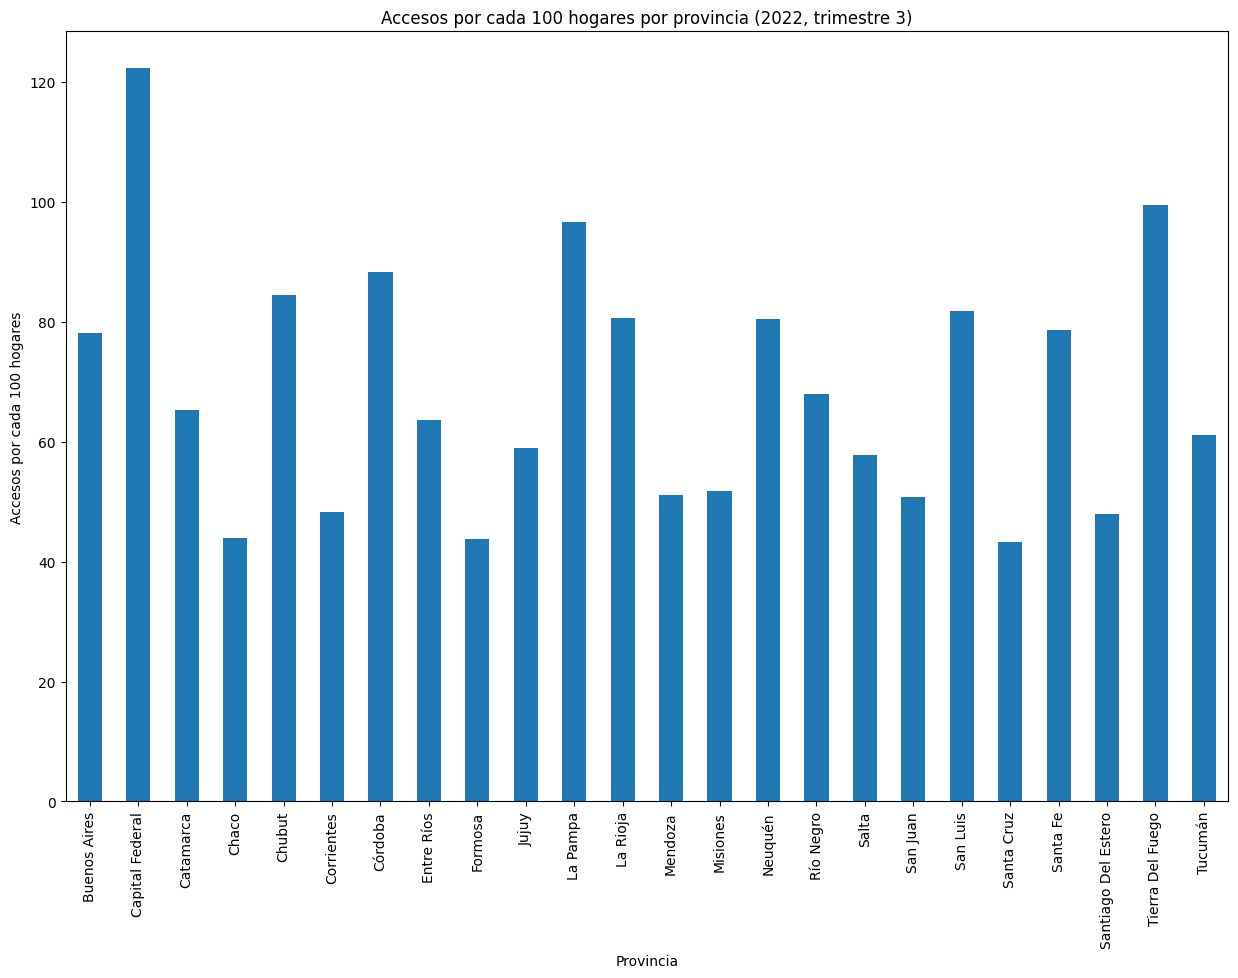

In [18]:
#   QUIERO VER LA DISTRIBUCION DE ACCESO A INTERNET POR PROVINCIAS EN LOS ULTIMOS DATOS REGISTRADOS (AÑO 2022 Y TRIMESTRE 3)

# filtra los datos por año y trimestre
df1_filtered = df1.loc[(df1['Año'] == 2022) & (df1['Trimestre'] == 3)]

# agrupa los datos por provincia y calcula la media de los accesos por cada 100 hogares
df1_grouped = df1_filtered.groupby(['Provincia'])['Accesos por cada 100 hogares'].mean()

# crea un gráfico de barras de los accesos por cada 100 hogares por provincia
df1_grouped.plot(kind='bar', figsize=(15, 10))

# agrega los títulos y etiquetas de los ejes
plt.title('Accesos por cada 100 hogares por provincia (2022, trimestre 3)')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')

# muestra el gráfico
plt.show()

OUTLIER A LA VISTA! Vemos en Capital Federal que el acceso por cada 100 hogares está por encima de 100, significa que hay más accesos a Internet que hogares en esa provincia, lo cual es claramente imposible. Es posible que haya un error en los datos, ya sea debido a una mala medición o a un error de entrada de datos. 
Buscando en internet, vi en diferentes fuentes que efectivamente en la capital federal, los accesos a internet superan el numero de viviendas, no se en que criterio se basan, quizas es la cantidad de megas que disponen, o modems que tengan en el domicilio, o tipos de tecnologías en una misma vivienda, no lo se...

In [24]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               840 non-null    int64 
 1   Trimestre         840 non-null    int64 
 2   Provincia         840 non-null    object
 3   Banda ancha fija  840 non-null    object
 4   Dial up           838 non-null    object
 5   Total             840 non-null    object
dtypes: int64(2), object(4)
memory usage: 39.5+ KB


In [32]:
#paso los valores Dial up, Banda ancha fija y Ttoal  a int, primero hago unas modificaciones para que me deje
df4.fillna(0, inplace=True)
df4['Dial up'] = df4['Dial up'].astype(str).replace({'- 0': '0',  '\.': ''}, regex=True).astype(int)

df4['Banda ancha fija'] = df4['Banda ancha fija'].astype(str).replace({'- 0': '0',  '\.': ''}, regex=True).astype(int)

df4['Total'] = df4['Total'].astype(str).replace({'- 0': '0',  '\.': ''}, regex=True).astype(int)

In [33]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               840 non-null    int64 
 1   Trimestre         840 non-null    int64 
 2   Provincia         840 non-null    object
 3   Banda ancha fija  840 non-null    int32 
 4   Dial up           840 non-null    int32 
 5   Total             840 non-null    int32 
dtypes: int32(3), int64(2), object(1)
memory usage: 29.7+ KB


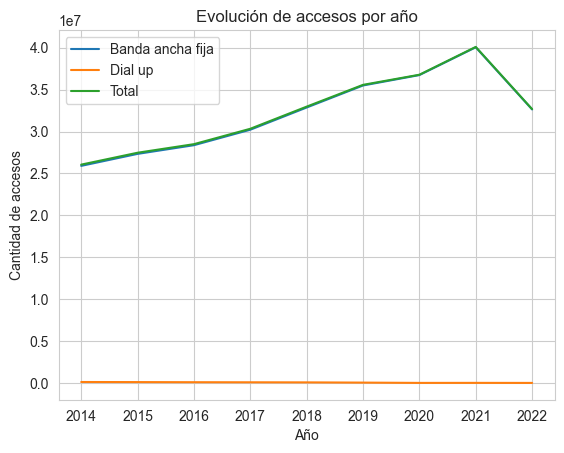

In [34]:
# Agrupar los datos por año y sumarlos para obtener los totales anuales
df4_anual = df4.groupby('Año')[['Banda ancha fija', 'Dial up', 'Total']].sum()

# Crear el gráfico de líneas
plt.plot(df4_anual.index, df4_anual['Banda ancha fija'], label='Banda ancha fija')
plt.plot(df4_anual.index, df4_anual['Dial up'], label='Dial up')
plt.plot(df4_anual.index, df4_anual['Total'], label='Total')

# Personalizar el gráfico
plt.title('Evolución de accesos por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')
plt.legend()

# Mostrar el gráfico
plt.show()

In [60]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     object 
 3   Cablemodem    35 non-null     object 
 4   Fibra óptica  35 non-null     object 
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.6+ KB


In [70]:
df5.sample(20)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
3,2021,4,16576150.0,5984240.0,2072236.0,523.107,252.596,10489794.0,Oct-Dic 2021
29,2015,2,37678210.0,2756294.0,150839.0,82.077,59.157,6816188.0,Abr-Jun 2015
22,2017,1,37088980.0,3276251.0,180146.0,84.813,55.746,7305854.0,Ene-Mar 2017
10,2020,1,22994570.0,4903674.0,1047817.0,352.333,209.145,8812426.0,Ene-Mar 2020
0,2022,3,13952770.0,6031970.0,2871541.0,557.110,235.230,11091128.0,Jul-Sept 2022
12,2019,3,29098050.0,4800091.0,852221.0,338.241,264.326,9164684.0,Jul-Sept 2019
18,2018,1,35742940.0,3981129.0,217460.0,165.300,98.870,8037053.0,Ene-Mar 2018
31,2014,4,37640380.0,2536219.0,149682.0,76.984,71.573,6598496.0,Oct-Dic 2014
34,2014,1,36970660.0,2407330.0,150323.0,70.749,72.930,6398398.0,Ene-Mar 2014
30,2015,1,37561530.0,2668248.0,168188.0,79.098,66.045,6737732.0,Ene-Mar 2015


In [69]:
df5['ADSL'] = df5['ADSL'].astype(str)
df5['ADSL'] = df5['ADSL'].str.replace('.', '')
df5['ADSL'] = df5['ADSL'].astype(float)

df5['Cablemodem'] = df5['Cablemodem'].astype(str)
df5['Cablemodem'] = df5['Cablemodem'].str.replace('.', '')
df5['Cablemodem'] = df5['Cablemodem'].astype(float)

df5['Fibra óptica'] = df5['Fibra óptica'].astype(str)
df5['Fibra óptica'] = df5['Fibra óptica'].str.replace('.', '')
df5['Fibra óptica'] = df5['Fibra óptica'].astype(float)

df5['Total'] = df5['Total'].astype(str)
df5['Total'] = df5['Total'].str.replace('.', '')
df5['Total'] = df5['Total'].astype(float)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8224\2079987570.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df5['ADSL'] = df5['ADSL'].str.replace('.', '')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8224\2079987570.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df5['Cablemodem'] = df5['Cablemodem'].str.replace('.', '')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8224\2079987570.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df5['Fibra óptica'] = df5['Fibra óptica'].str.replace('.', '')
C:\Users\LENOVO\A

In [72]:
import re

# Creamos una función para extraer el trimestre de cada valor en la columna 'Periodo'
def get_trimestre(row):
    pattern = r'(\bEne-Mar\b|\bAbr-Jun\b|\bJul-Sept\b|\bOct-Dic\b)'
    match = re.search(pattern, row)
    if match:
        trimestre = match.group(1)
        if trimestre == 'Ene-Mar':
            return 1
        elif trimestre == 'Abr-Jun':
            return 2
        elif trimestre == 'Jul-Sept':
            return 3
        elif trimestre == 'Oct-Dic':
            return 4
    else:
        return None

# Aplicamos la función a la columna 'Periodo' y creamos una nueva columna 'Trimestre'
df5['Trimestre'] = df5['Periodo'].apply(get_trimestre)

# Eliminamos la columna 'Periodo'
df5.drop('Periodo', axis=1, inplace=True)

# Convertimos la columna 'Trimestre' a tipo int
df5['Trimestre'] = df5['Trimestre'].astype(int)

In [73]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int32  
 2   ADSL          35 non-null     float64
 3   Cablemodem    35 non-null     float64
 4   Fibra óptica  35 non-null     float64
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     float64
dtypes: float64(6), int32(1), int64(1)
memory usage: 2.2 KB


In [110]:
df5.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,13952770.0,6031970.0,2871541.0,557.110,235.230,11091128.0
1,2022,2,14683330.0,5979214.0,2723285.0,556.243,231.609,10958684.0
2,2022,1,15332400.0,6073426.0,2219533.0,545.814,251.996,10624009.0
3,2021,4,16576150.0,5984240.0,2072236.0,523.107,252.596,10489794.0
4,2021,3,19506310.0,5826257.0,1566048.0,492.415,250.190,10085541.0


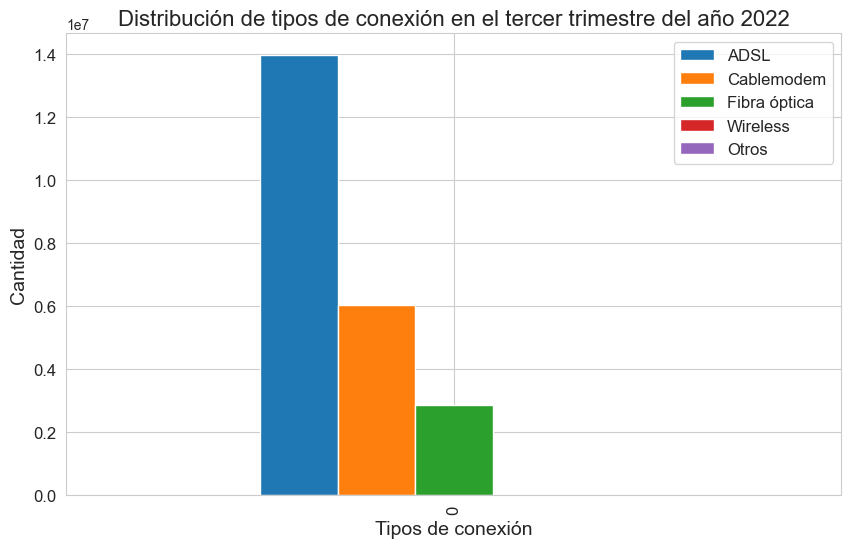

In [111]:
# Filtrar datos
df_filtered = df5[(df5['Año'] == 2022) & (df5['Trimestre'] == 3)]

# Seleccionar campos a graficar
fields = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
data = df_filtered[fields]

# Generar gráfico de barras
ax = data.plot(kind='bar', figsize=(10, 6), legend=True, fontsize=12)

# Configurar gráfico
ax.set_title('Distribución de tipos de conexión en el tercer trimestre del año 2022', fontsize=16)
ax.set_xlabel('Tipos de conexión', fontsize=14)
ax.set_ylabel('Cantidad', fontsize=14)
ax.legend(fontsize=12)

# Mostrar gráfico
plt.show()

In [74]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int64  
 1   Trimestre               840 non-null    int64  
 2   Provincia               840 non-null    object 
 3   Mbps (Media de bajada)  840 non-null    int64  
 4   Unnamed: 4              0 non-null      float64
 5   Unnamed: 5              0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 39.5+ KB


In [75]:
#saco esas columnas vacias, el resto esta ok

df9 = df9.drop('Unnamed: 4', axis=1)
df9 = df9.drop('Unnamed: 5', axis=1)

In [77]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [81]:
df13 = df13.drop('Periodo', axis=1) #borro periodo total tengo trimestre y año

In [83]:
df13['Ingresos (miles de pesos)'] = df13['Ingresos (miles de pesos)'].astype(str)
df13['Ingresos (miles de pesos)'] = df13['Ingresos (miles de pesos)'].str.replace('.', '')
df13['Ingresos (miles de pesos)'] = df13['Ingresos (miles de pesos)'].astype(int)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8224\1943762906.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df13['Ingresos (miles de pesos)'] = df13['Ingresos (miles de pesos)'].str.replace('.', '')


In [84]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Año                        35 non-null     int64
 1   Trimestre                  35 non-null     int64
 2   Ingresos (miles de pesos)  35 non-null     int32
dtypes: int32(1), int64(2)
memory usage: 832.0 bytes


In [122]:
df17=pd.read_csv('csv/17.ConectividadalserviciodeInternet_2776151682003289226.csv')

In [123]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           4300 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.1+ KB


In [86]:
df17.head(15)

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,"-38,6472605094596","-62,3200223419024"
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248"
3,BUENOS AIRES,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442"
4,BUENOS AIRES,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"
5,BUENOS AIRES,Balcarce,Ramos Otero,95,--,--,--,--,--,SI,--,--,SI,6063040.0,"-37,5426353712017","-58,3407185507274"
6,BUENOS AIRES,Balcarce,San Agustín,498,--,--,--,--,--,SI,SI,--,--,6063050.0,"-38,0122838564587","-58,355377761682"
7,BUENOS AIRES,Balcarce,Villa Laguna La Brava,115,--,--,--,--,--,SI,SI,SI,SI,6063060.0,"-37,8596285282151","-57,9806008736401"
8,BUENOS AIRES,Baradero,Baradero,28537,SI,SI,--,SI,SI,SI,SI,SI,SI,6070010.0,"-33,8128781547156","-59,5043068852807"
9,BUENOS AIRES,Baradero,Irineo Portela,379,--,--,--,SI,SI,SI,SI,--,--,6070020.0,"-33,9810489198561","-59,6715601606315"


In [ ]:
df17 = df17.drop('link', axis=1)

In [ ]:
df17 = df17.drop('Latitud', axis=1)
df17 = df17.drop('Longitud', axis=1)

In [127]:
df17 = df17.replace('--', '0')
df17 = df17.replace('SI', '1')

In [128]:
df17.head()

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,Latitud,Longitud
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,0,0,0,0,0,0,0,1,1,"-38,6472605094596","-62,3200223419024"
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,0,0,0,0,0,0,0,0,0,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,Balcarce,Balcarce,38376,1,1,1,1,0,1,1,1,1,"-37,8482779294345","-58,2551665841248"
3,BUENOS AIRES,Balcarce,Los Pinos,337,0,0,0,0,0,1,1,0,0,"-37,9412057603","-58,3225920150442"
4,BUENOS AIRES,Balcarce,Napaleofú,374,0,0,0,1,0,1,1,1,1,"-37,6254980210026","-58,7461862359423"


In [129]:
df17['ADSL'] = df17['ADSL'].astype(int)
df17['CABLEMODEM'] = df17['CABLEMODEM'].astype(int)
df17['DIALUP'] = df17['DIALUP'].astype(int)
df17['FIBRAOPTICA'] = df17['FIBRAOPTICA'].astype(int)
df17['SATELITAL'] = df17['SATELITAL'].astype(int)
df17['WIRELESS'] = df17['WIRELESS'].astype(int)
df17['TELEFONIAFIJA'] = df17['TELEFONIAFIJA'].astype(int)
df17['3G'] = df17['3G'].astype(int)
df17['4G'] = df17['4G'].astype(int)

In [108]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      4312 non-null   object
 1   Partido        4312 non-null   object
 2   Localidad      4312 non-null   object
 3   Poblacion      4312 non-null   int64 
 4   ADSL           4312 non-null   int32 
 5   CABLEMODEM     4312 non-null   int32 
 6   DIALUP         4312 non-null   int32 
 7   FIBRAOPTICA    4312 non-null   int32 
 8   SATELITAL      4312 non-null   int32 
 9   WIRELESS       4312 non-null   int32 
 10  TELEFONIAFIJA  4312 non-null   int32 
 11  3G             4312 non-null   int32 
 12  4G             4312 non-null   int32 
dtypes: int32(9), int64(1), object(3)
memory usage: 286.5+ KB


In [91]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tipo de reclamo  4 non-null      object
 1   Cantidad         4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [92]:
clases = df18['Tipo de reclamo'].unique()
print(clases)

['Facturación' 'Gestiones Administrativas' 'Otros' 'Problemas Técnicos']


In [93]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AÑO          8 non-null      int64 
 1   DESTINADOS   8 non-null      object
 2   ADJUDICADOS  8 non-null      object
 3   EJECUTADOS   8 non-null      object
dtypes: int64(1), object(3)
memory usage: 388.0+ bytes


In [94]:
df19.head()

,AÑO,DESTINADOS,ADJUDICADOS,EJECUTADOS
0,2016,"$ 1,980,548,337.17","$ 1,329,000,000","$ 884,170,254.12"
1,2017,"$ 5,369,096,276.5","$ 5,380,043,965.31","$ 1,165,807,795.83"
2,2018,"$ 3,072,233,661.56","$ 769,287,979.97","$ 1,057,520,964.12"
3,2019,"$ 2,159,216,898","$ 1,147,689,567.23","$ 2,204,613,874.27"
4,2020,"$ 10,476,532,000","$ 4,605,412,427.25","$ 1,153,020,135.55"


In [97]:
df19['DESTINADOS'] = df19['DESTINADOS'].replace('[\$,]', '', regex=True).astype(float)
df19['ADJUDICADOS'] = df19['ADJUDICADOS'].replace('[\$,]', '', regex=True).astype(float)
df19['EJECUTADOS'] = df19['EJECUTADOS'].replace('[\$,]', '', regex=True).astype(float)

In [98]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AÑO          8 non-null      int64  
 1   DESTINADOS   8 non-null      float64
 2   ADJUDICADOS  8 non-null      float64
 3   EJECUTADOS   8 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 388.0 bytes


In [109]:
df19.head()

,AÑO,DESTINADOS,ADJUDICADOS,EJECUTADOS
0,2016,1.980548e+09,1.329000e+09,8.841703e+08
1,2017,5.369096e+09,5.380044e+09,1.165808e+09
2,2018,3.072234e+09,7.692880e+08,1.057521e+09
3,2019,2.159217e+09,1.147690e+09,2.204614e+09
4,2020,1.047653e+10,4.605412e+09,1.153020e+09
5,2021,1.559497e+10,8.502632e+09,5.549111e+09
6,2022,2.182148e+10,8.656935e+09,6.320880e+09
7,2023,4.000000e+09,5.087155e+07,1.424654e+09


In [117]:
df20=pd.read_csv('csv/IngresosPorProvincia.csv')

In [118]:
df20.head()

,Provincia,Ingreso
0,Tierra del Fuego,247340
1,CABA,220875
2,Chubut,197964
3,Santa Cruz,185961
4,Neuquen,177309


In [119]:
df20.to_csv('1_Ingresos_por_Provincia.csv', index=False)

In [120]:
df19.to_csv('2_Fondos_Destinados_Adjudicados_Ejecutados.csv', index=False)

df17.to_csv('4_Conexiones_dispo_xloc.csv', index=False)

df13.to_csv('5_Ingresos_xPrestaciones.csv', index=False)

df9.to_csv('6_Vel_Media_Bajada.csv', index=False)

df5.to_csv('7_Accesos_tipo_conexion.csv', index=False)

df4.to_csv('8_Acceso_bandaancha_angosta.csv', index=False)

df1.to_csv('9_Acceso_100hogares.csv', index=False)



In [121]:
df18.to_csv('3_Tipos_Reclamos.csv', index=False)

In [136]:
df21=pd.read_csv('Acceso_100hogares_mapa.csv')
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           24 non-null     int64  
 1   Trimestre                     24 non-null     int64  
 2   Provincia                     24 non-null     object 
 3   Accesos por cada 100 hogares  24 non-null     float64
 4   Latitud                       24 non-null     float64
 5   Longitud                      24 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.3+ KB
